[0 0 0 ... 0 0 0]
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

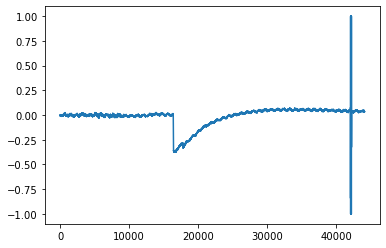

In [14]:
import comnumfip2
from importlib import reload
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

reload(comnumfip2)

fs=44100
duration=1
analog_test =[]
while len(analog_test)==0:
    analog = sd.rec(int(duration*fs),samplerate=fs,channels=1)
    sd.wait()
    #Filtre de réception
    mask = (analog<-0.9) | (analog>0.9) #On garde tout ce qui a une amplitude de plus de 0.9V
    analog_test = analog[mask]
signal=[]
for x in analog:
    if x > 0.5 or x < -0.5:
        signal.append(1)
    else:
        signal.append(0)

plt.plot(analog)
signal=np.array(signal)
bin=comnumfip2.sample_and_threshold(signal,0.5)
print(bin)
print(comnumfip2.bin2ascii(bin))
